<a href="https://colab.research.google.com/github/OscarW99/applied-ml-series/blob/main/ClassicalML1_1_The_Fundementals_of_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro1.1 – Model-Based Learning Example: Linear Regression on Drug Sensitivity

In this notebook, we'll walk through a simple **model-based learning** task.  
We want to predict how sensitive a cancer cell line is to a drug, using the expression level of a single gene (GeneX).

In [ ]:
# Step 1: Import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Step 2: Create a small synthetic dataset

We're simulating a dataset where each cell line has:
- An expression value for GeneX (normalized)
- An experimentally measured IC50 value (lower IC50 = more sensitive to drug)

In [ ]:
# Create toy dataset

data = {
    'GeneX_Expression': [1.5, 2.0, 3.0, 4.5, 5.0, 6.5, 7.0, 8.0, 9.5, 10.0],
    'IC50_nM': [100, 90, 75, 60, 50, 40, 30, 25, 15, 10]  # Inverse relationship
}

df = pd.DataFrame(data)
df

,GeneX_Expression,IC50_nM
0,1.5,100
1,2.0,90
2,3.0,75
3,4.5,60
4,5.0,50
5,6.5,40
6,7.0,30
7,8.0,25
8,9.5,15
9,10.0,10


## Step 3: Visualize the raw data

This helps us explore whether there's a visible trend between GeneX expression and drug response.

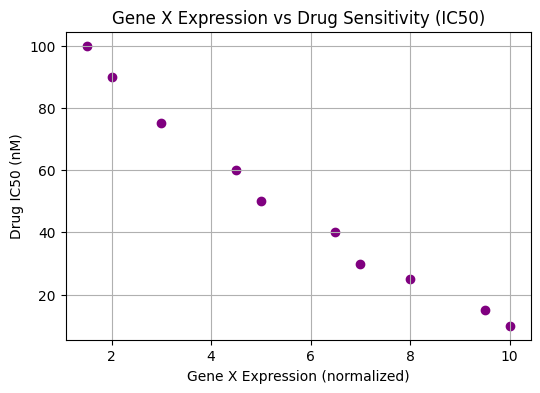

In [ ]:
# Scatter plot of the data

plt.figure(figsize=(6, 4))
plt.scatter(df["GeneX_Expression"], df["IC50_nM"], color='purple')
plt.xlabel("Gene X Expression (normalized)")
plt.ylabel("Drug IC50 (nM)")
plt.title("Gene X Expression vs Drug Sensitivity (IC50)")
plt.grid(True)
plt.show()

## Step 4: Prepare data for model training

Split the data into input features `X` and target labels `y`.

In [ ]:
# Features and targets

X = df[["GeneX_Expression"]]  # Predictor
y = df[["IC50_nM"]]           # Target

## Step 5: Select and train a linear regression model

We'll use Scikit-Learn's `LinearRegression` to learn a line of best fit.

In [ ]:
# Initialize and train the model

model = LinearRegression()
model.fit(X, y)

LinearRegression()

## Step 6: Visualize the trained model

We plot the regression line on top of the original data to see how well it fits.

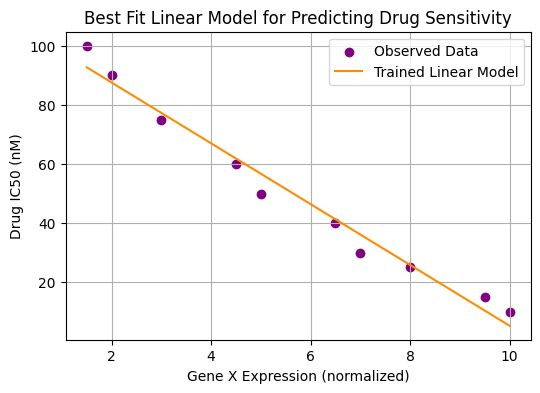

In [ ]:
# Plot data + fitted line

plt.figure(figsize=(6, 4))
plt.scatter(X, y, color='purple', label='Observed Data')
plt.plot(X, model.predict(X), color='darkorange', label='Trained Linear Model')
plt.xlabel("Gene X Expression (normalized)")
plt.ylabel("Drug IC50 (nM)")
plt.title("Best Fit Linear Model for Predicting Drug Sensitivity")
plt.legend()
plt.grid(True)
plt.show()

## Step 7: Make a prediction

Let’s say we encounter a new cell line with a GeneX expression level of 5.5.
We can use our trained model to predict its drug sensitivity.

In [ ]:
# Predict IC50 for a new cell line

new_expression = [[5.5]]
predicted_ic50 = model.predict(new_expression)
predicted_ic50

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[51.5567201]])

## Step 8: Summary

What we just did:
1. Explored the data visually.
2. Chose a linear model based on the observed trend.
3. Trained the model using Scikit-Learn.
4. Visualized the fitted model.
5. Used the model to make a prediction on new data.

This is a basic example of **model-based learning**: we build an abstract model that captures a pattern in the data, and then use that model to generalize to unseen cases.